In [1]:
import pandas as pd
import numpy as np
from pytrends.request import TrendReq
from sklearn.preprocessing import MinMaxScaler

In [2]:
pytrends = TrendReq(hl='en-US', tz=360)

In [39]:
# climate_df = pd.DataFrame()
# weather_df = pd.DataFrame()
ukraine_df = pd.DataFrame()
russia_df = pd.DataFrame()
kw_list = ["Score", "Results", "Match"]

for country in ['US', 'FR', 'ES', 'IT', 'CA', 'CH', 'JP']:
    payload = pytrends.build_payload(kw_list, cat=20, timeframe='today 5-y', geo=country, gprop='')
    russia_df[country] = pytrends.interest_over_time()["Score"]
    ukraine_df[country] = pytrends.interest_over_time()["Match"]
    # climate_df[country] = pytrends.interest_over_time()["Climate"]
    #weather_df[country] = pytrends.interest_over_time()["Weather"]

<Axes: xlabel='date'>

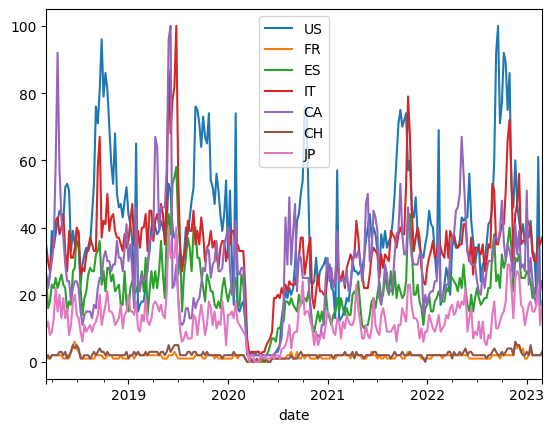

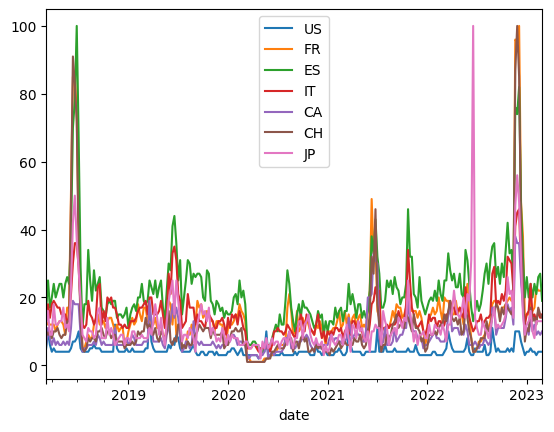

In [40]:
russia_df.plot()
ukraine_df.plot()

In [43]:
whales = pd.read_csv('../whales.csv', parse_dates=['date']).set_index('date')

<Axes: xlabel='date'>

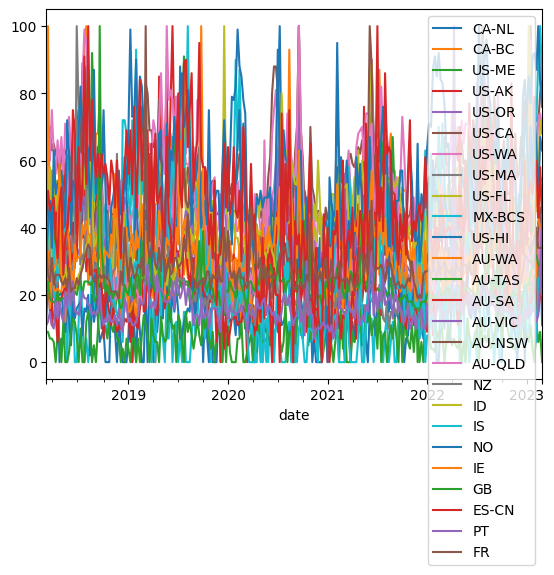

In [44]:
whales.plot()